In [67]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from  keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import time

In [68]:
NAME = "Titanic_dataset_{}".format(int(time.time()))

In [69]:
#tensoboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [70]:
#python -m tensorboard.main --logdir==training:logs/ --host=127.0.0.1
#python -m tensorboard.main --logdir=logs/ --port=8080
#http://172.17.0.2:8080

In [71]:
data = pd.read_csv('train.csv')

In [72]:
test = pd.read_csv('test.csv')

In [73]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
1044-892

152

In [75]:
from sklearn.preprocessing import Imputer

In [76]:
im = Imputer()

In [77]:
test.iloc[152,8]

nan

In [78]:
im.fit(test[['Fare']])
test['Fare'] = im.fit_transform(test[['Fare']]).ravel()

In [79]:
female = pd.get_dummies(data['Sex'],prefix='Sex')

In [80]:
femalet = pd.get_dummies(test['Sex'],prefix='Sex')

In [81]:
female.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [82]:
data.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


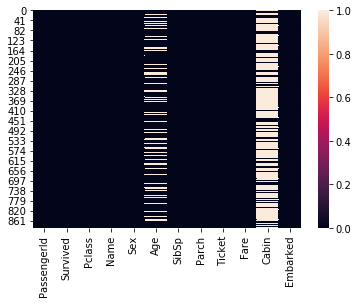

In [84]:
sns.heatmap(data.isnull())

In [85]:
def get_dummmy(df,cols):
    for col in cols:
        df = pd.concat([df,pd.get_dummies(df[col],drop_first=True,prefix=col)],axis=1)
        df = df.drop(col,axis=1)
    return df

In [86]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [87]:
cols = ['Pclass','Sex','Embarked']

In [88]:
data = get_dummmy(data,cols)

In [89]:
data.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [90]:
cols = ['Pclass','Sex','Embarked']

In [91]:
test = get_dummmy(test,cols)

In [92]:
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,1,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,0,1,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,1,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,1,0,0,1


In [93]:
data['Name'][0].split(',')[1].split('.')[0].strip()

'Mr'

In [94]:
data['Name'] = data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [95]:
test['Name'] = test['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [96]:
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,892,Mr,34.5,0,0,330911,7.8292,NaN,0,1,1,1,0
1,893,Mrs,47.0,1,0,363272,7.0000,NaN,0,1,0,0,1
2,894,Mr,62.0,0,0,240276,9.6875,NaN,1,0,1,1,0
3,895,Mr,27.0,0,0,315154,8.6625,NaN,0,1,1,0,1
4,896,Mrs,22.0,1,1,3101298,12.2875,NaN,0,1,0,0,1


In [97]:
data.Cabin.fillna('U',inplace=True)

In [98]:
test.Cabin.fillna('U',inplace=True)

In [99]:
test.Cabin.unique()

array(['U', 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [100]:
data['Cabin'][1][0]

'C'

In [101]:
data['Cabin'] = data['Cabin'].apply(lambda x:x[0])

In [102]:
test['Cabin'] = test['Cabin'].apply(lambda x:x[0])

In [103]:
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,892,Mr,34.5,0,0,330911,7.8292,U,0,1,1,1,0
1,893,Mrs,47.0,1,0,363272,7.0000,U,0,1,0,0,1
2,894,Mr,62.0,0,0,240276,9.6875,U,1,0,1,1,0
3,895,Mr,27.0,0,0,315154,8.6625,U,0,1,1,0,1
4,896,Mrs,22.0,1,1,3101298,12.2875,U,0,1,0,0,1


In [104]:
test.Cabin.value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

In [105]:
data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,Mr,22.0,1,0,A/5 21171,7.2500,U,0,1,1,0,1
1,2,1,Mrs,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,Miss,26.0,0,0,STON/O2. 3101282,7.9250,U,0,1,0,0,1
3,4,1,Mrs,35.0,1,0,113803,53.1000,C,0,0,0,0,1
4,5,0,Mr,35.0,0,0,373450,8.0500,U,0,1,1,0,1


In [106]:
"""fig = plt.figure(figsize=(20,6))
i=1
for t in cabin.unique():
    plt.subplot(3,6,i)
    plt.title(t)
    sns.barplot(data['Survived'],data.Survived[data['Cabin']==t].value_counts())
    i+=1"""

"fig = plt.figure(figsize=(20,6))\ni=1\nfor t in cabin.unique():\n    plt.subplot(3,6,i)\n    plt.title(t)\n    sns.barplot(data['Survived'],data.Survived[data['Cabin']==t].value_counts())\n    i+=1"

In [107]:
data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,Mr,22.0,1,0,A/5 21171,7.2500,U,0,1,1,0,1
1,2,1,Mrs,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,Miss,26.0,0,0,STON/O2. 3101282,7.9250,U,0,1,0,0,1
3,4,1,Mrs,35.0,1,0,113803,53.1000,C,0,0,0,0,1
4,5,0,Mr,35.0,0,0,373450,8.0500,U,0,1,1,0,1


In [108]:
def age(cols):
    age= cols[0]
    title = cols[1]
    if pd.isnull(age):
        age = data.Age[data['Name']==title].mean()
    return age

In [109]:
data['Age'] = data[['Age','Name']].apply(age,axis=1)

In [110]:
test['Age'] = test[['Age','Name']].apply(age,axis=1)

In [111]:
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,892,Mr,34.5,0,0,330911,7.8292,U,0,1,1,1,0
1,893,Mrs,47.0,1,0,363272,7.0000,U,0,1,0,0,1
2,894,Mr,62.0,0,0,240276,9.6875,U,1,0,1,1,0
3,895,Mr,27.0,0,0,315154,8.6625,U,0,1,1,0,1
4,896,Mrs,22.0,1,1,3101298,12.2875,U,0,1,0,0,1


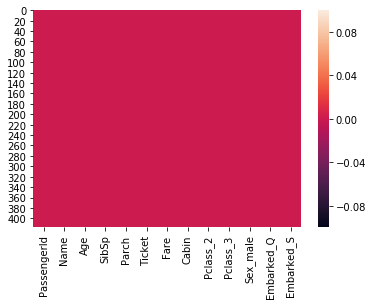

In [112]:
sns.heatmap(test.isnull())

In [113]:
data.dropna(inplace=True)
test.dropna(inplace=True)

In [114]:
cols = ['Name','Cabin']

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
lb = LabelEncoder()

In [117]:
data['Cabin'] = lb.fit_transform(data['Cabin'])

In [118]:
data['Name'] = lb.fit_transform(data['Name'])

In [119]:
test['Name'] = lb.fit_transform(test['Name'])

In [120]:
test['Cabin'] = lb.fit_transform(test['Cabin'])

In [121]:
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,892,5,34.5,0,0,330911,7.8292,7,0,1,1,1,0
1,893,6,47.0,1,0,363272,7.0000,7,0,1,0,0,1
2,894,5,62.0,0,0,240276,9.6875,7,1,0,1,1,0
3,895,5,27.0,0,0,315154,8.6625,7,0,1,1,0,1
4,896,6,22.0,1,1,3101298,12.2875,7,0,1,0,0,1


In [122]:
data = pd.concat([data,female.Sex_female],axis=1)

In [123]:
test = pd.concat([test,femalet.Sex_female],axis=1)

In [124]:
test = test.drop(['Sex_male'],axis=1)
data = data.drop(['Sex_male'],axis=1)

In [125]:
data = data.drop(['Ticket'],axis=1)
test = test.drop(['Ticket'],axis=1)

In [126]:
test.head()

,PassengerId,Name,Age,SibSp,Parch,Fare,Cabin,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_female
0,892,5,34.5,0,0,7.8292,7,0,1,1,0,0
1,893,6,47.0,1,0,7.0000,7,0,1,0,1,1
2,894,5,62.0,0,0,9.6875,7,1,0,1,0,0
3,895,5,27.0,0,0,8.6625,7,0,1,0,1,0
4,896,6,22.0,1,1,12.2875,7,0,1,0,1,1


In [127]:
data = data.dropna()
test = test.dropna()

In [128]:
_id = test.PassengerId

In [129]:
data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,Cabin,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_female
0,1,0,11,22.0,1,0,7.2500,8,0,1,0,1,0
1,2,1,12,38.0,1,0,71.2833,2,0,0,0,0,1
2,3,1,8,26.0,0,0,7.9250,8,0,1,0,1,1
3,4,1,12,35.0,1,0,53.1000,2,0,0,0,1,1
4,5,0,11,35.0,0,0,8.0500,8,0,1,0,1,0


In [130]:
data.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)

In [131]:
X = data.drop('Survived',axis=1)
y= data['Survived']

In [66]:
data.head()

,Survived,Name,Age,SibSp,Parch,Fare,Cabin,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_female
0,0,11,22.0,1,0,7.2500,8,0,1,0,1,0
1,1,12,38.0,1,0,71.2833,2,0,0,0,0,1
2,1,8,26.0,0,0,7.9250,8,0,1,0,1,1
3,1,12,35.0,1,0,53.1000,2,0,0,0,1,1
4,0,11,35.0,0,0,8.0500,8,0,1,0,1,0


In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
st = StandardScaler()
X = st.fit_transform(X)
test = st.fit_transform(test)

In [145]:
y=pd.get_dummies(y)

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 43)

In [557]:
from keras.layers import BatchNormalization
import keras.backend as K

In [558]:
K.clear_session()

In [559]:
model = Sequential()
model.add(Dense(12,input_shape = (11,),activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2,activation='softmax'))
model.compile(Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [560]:
initial_wt= model.get_weights()

In [565]:
model.fit(X_train,y_train,epochs=500,validation_split=0.2,callbacks=[tensoboard])

Train on 569 samples, validate on 143 samples
Epoch 1/500
569/569 [==============================] - 0s 67us/step - loss: 0.2322 - acc: 0.9174 - val_loss: 0.7171 - val_acc: 0.7972
Epoch 2/500
569/569 [==============================] - 0s 110us/step - loss: 0.2330 - acc: 0.9051 - val_loss: 0.8628 - val_acc: 0.7692
Epoch 3/500
569/569 [==============================] - 0s 123us/step - loss: 0.2539 - acc: 0.9192 - val_loss: 0.7640 - val_acc: 0.7692
Epoch 4/500
569/569 [==============================] - 0s 179us/step - loss: 0.2356 - acc: 0.9086 - val_loss: 0.7784 - val_acc: 0.7622
Epoch 5/500
569/569 [==============================] - 0s 105us/step - loss: 0.2205 - acc: 0.9227 - val_loss: 0.7943 - val_acc: 0.7622
Epoch 6/500
569/569 [==============================] - 0s 110us/step - loss: 0.2430 - acc: 0.9174 - val_loss: 0.8044 - val_acc: 0.7622
Epoch 7/500
569/569 [==============================] - 0s 98us/step - loss: 0.2232 - acc: 0.9174 - val_loss: 0.8267 - val_acc: 0.7622
Epoch 8/500

569/569 [==============================] - 0s 107us/step - loss: 0.2188 - acc: 0.9086 - val_loss: 0.8771 - val_acc: 0.7692
Epoch 62/500
569/569 [==============================] - 0s 96us/step - loss: 0.2156 - acc: 0.9315 - val_loss: 0.8611 - val_acc: 0.7692
Epoch 63/500
569/569 [==============================] - 0s 96us/step - loss: 0.2261 - acc: 0.9156 - val_loss: 0.8702 - val_acc: 0.7622
Epoch 64/500
569/569 [==============================] - 0s 138us/step - loss: 0.2228 - acc: 0.9174 - val_loss: 0.8679 - val_acc: 0.7692
Epoch 65/500
569/569 [==============================] - 0s 116us/step - loss: 0.2184 - acc: 0.9244 - val_loss: 0.7950 - val_acc: 0.8112
Epoch 66/500
569/569 [==============================] - 0s 145us/step - loss: 0.2525 - acc: 0.9104 - val_loss: 0.7123 - val_acc: 0.7762
Epoch 67/500
569/569 [==============================] - 0s 95us/step - loss: 0.2255 - acc: 0.9121 - val_loss: 0.8136 - val_acc: 0.7622
Epoch 68/500
569/569 [==============================] - 0s 96us/

569/569 [==============================] - 0s 107us/step - loss: 0.2402 - acc: 0.9192 - val_loss: 0.7480 - val_acc: 0.7972
Epoch 122/500
569/569 [==============================] - 0s 110us/step - loss: 0.2402 - acc: 0.9104 - val_loss: 0.7542 - val_acc: 0.7832
Epoch 123/500
569/569 [==============================] - 0s 135us/step - loss: 0.2542 - acc: 0.8963 - val_loss: 0.7444 - val_acc: 0.7902
Epoch 124/500
569/569 [==============================] - 0s 100us/step - loss: 0.2350 - acc: 0.9104 - val_loss: 0.7571 - val_acc: 0.7832
Epoch 125/500
569/569 [==============================] - 0s 100us/step - loss: 0.2418 - acc: 0.9121 - val_loss: 0.7448 - val_acc: 0.7552
Epoch 126/500
569/569 [==============================] - 0s 103us/step - loss: 0.2675 - acc: 0.8946 - val_loss: 0.7059 - val_acc: 0.7832
Epoch 127/500
569/569 [==============================] - 0s 126us/step - loss: 0.2157 - acc: 0.9279 - val_loss: 0.6915 - val_acc: 0.7972
Epoch 128/500
569/569 [==============================] 

Epoch 241/500
569/569 [==============================] - 0s 128us/step - loss: 0.1842 - acc: 0.9385 - val_loss: 0.6798 - val_acc: 0.7902
Epoch 242/500
569/569 [==============================] - 0s 98us/step - loss: 0.2309 - acc: 0.9209 - val_loss: 0.6885 - val_acc: 0.7762
Epoch 243/500
569/569 [==============================] - 0s 124us/step - loss: 0.1936 - acc: 0.9367 - val_loss: 0.7088 - val_acc: 0.7902
Epoch 244/500
569/569 [==============================] - 0s 98us/step - loss: 0.2092 - acc: 0.9262 - val_loss: 0.6764 - val_acc: 0.8042
Epoch 245/500
569/569 [==============================] - 0s 135us/step - loss: 0.2227 - acc: 0.9192 - val_loss: 0.6402 - val_acc: 0.7762
Epoch 246/500
569/569 [==============================] - 0s 149us/step - loss: 0.2028 - acc: 0.9297 - val_loss: 0.6761 - val_acc: 0.7622
Epoch 247/500
569/569 [==============================] - 0s 109us/step - loss: 0.2056 - acc: 0.9350 - val_loss: 0.7074 - val_acc: 0.7692
Epoch 248/500
569/569 [====================

Epoch 361/500
569/569 [==============================] - 0s 128us/step - loss: 0.2242 - acc: 0.9174 - val_loss: 0.7369 - val_acc: 0.7622
Epoch 362/500
569/569 [==============================] - 0s 100us/step - loss: 0.2188 - acc: 0.9086 - val_loss: 0.7250 - val_acc: 0.7622
Epoch 363/500
569/569 [==============================] - 0s 84us/step - loss: 0.2323 - acc: 0.9192 - val_loss: 0.7234 - val_acc: 0.7692
Epoch 364/500
569/569 [==============================] - 0s 98us/step - loss: 0.2169 - acc: 0.9262 - val_loss: 0.6875 - val_acc: 0.7692
Epoch 365/500
569/569 [==============================] - 0s 98us/step - loss: 0.2282 - acc: 0.9227 - val_loss: 0.6673 - val_acc: 0.7762
Epoch 366/500
569/569 [==============================] - 0s 100us/step - loss: 0.1981 - acc: 0.9350 - val_loss: 0.7155 - val_acc: 0.7832
Epoch 367/500
569/569 [==============================] - 0s 102us/step - loss: 0.2028 - acc: 0.9262 - val_loss: 0.7300 - val_acc: 0.7762
Epoch 368/500
569/569 [=====================

Epoch 421/500
569/569 [==============================] - 0s 96us/step - loss: 0.2025 - acc: 0.9315 - val_loss: 0.7340 - val_acc: 0.8042
Epoch 422/500
569/569 [==============================] - 0s 102us/step - loss: 0.2130 - acc: 0.9297 - val_loss: 0.7747 - val_acc: 0.7692
Epoch 423/500
569/569 [==============================] - 0s 116us/step - loss: 0.2344 - acc: 0.9121 - val_loss: 0.7219 - val_acc: 0.7692
Epoch 424/500
569/569 [==============================] - 0s 96us/step - loss: 0.2152 - acc: 0.9227 - val_loss: 0.6536 - val_acc: 0.7552
Epoch 425/500
569/569 [==============================] - 0s 96us/step - loss: 0.2131 - acc: 0.9156 - val_loss: 0.6662 - val_acc: 0.7902
Epoch 426/500
569/569 [==============================] - 0s 117us/step - loss: 0.2095 - acc: 0.9227 - val_loss: 0.6772 - val_acc: 0.7832
Epoch 427/500
569/569 [==============================] - 0s 142us/step - loss: 0.2202 - acc: 0.9156 - val_loss: 0.6381 - val_acc: 0.7902
Epoch 428/500
569/569 [=====================

Epoch 481/500
569/569 [==============================] - 0s 107us/step - loss: 0.2107 - acc: 0.9156 - val_loss: 0.7913 - val_acc: 0.7552
Epoch 482/500
569/569 [==============================] - 0s 74us/step - loss: 0.2276 - acc: 0.9104 - val_loss: 0.7940 - val_acc: 0.7622
Epoch 483/500
569/569 [==============================] - 0s 93us/step - loss: 0.2429 - acc: 0.9174 - val_loss: 0.7532 - val_acc: 0.8112
Epoch 484/500
569/569 [==============================] - 0s 105us/step - loss: 0.2141 - acc: 0.9156 - val_loss: 0.7111 - val_acc: 0.7832
Epoch 485/500
569/569 [==============================] - 0s 107us/step - loss: 0.2312 - acc: 0.9209 - val_loss: 0.6855 - val_acc: 0.7832
Epoch 486/500
569/569 [==============================] - 0s 133us/step - loss: 0.2048 - acc: 0.9297 - val_loss: 0.6571 - val_acc: 0.7832
Epoch 487/500
569/569 [==============================] - 0s 98us/step - loss: 0.2116 - acc: 0.9315 - val_loss: 0.6781 - val_acc: 0.7832
Epoch 488/500
569/569 [=====================

In [148]:
score,acc = model.evaluate(X_test,y_test)
print(score,acc)

179/179 [==============================] - 1s 3ms/step
0.5549271366449707 0.8156424571015981


In [277]:
#model.save('Titanic.h5')

In [133]:
from keras.models import load_model

In [134]:
#model = load_model('Titanic.h5')

In [149]:
pred = model.predict_classes(test)

In [138]:
#x = _id.apply(lambda x:int(x))

In [150]:
submission = pd.DataFrame({
    "PassengerId": _id,
    "Survived": pred
})

In [151]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0


In [153]:
submission.to_csv('titanic-predictions.csv', index=False)